# 4. 셀프 주유소는 정말 저렴할까?

## 4-1 Selenium 사용하기

 * 오피넷: https://www.opinet.co.kr/searRgSelect.do
     - 지역을 변경해도 URL이 변경되지 않음
 
 * BeautifulSoup 모듈은 로그인이 필요하거나 어떠한 버튼 등을 클릭한 뒤 나오는 페이지의 정보들을 가져오기 어렵다
 * Selenium : https://www.selenium.dev/documentation/   (공식 문서)
     - 웹 브라우저를 원격 조작하는 도구
     - 자동으로 URL을 열고 클릭 등의 매크로 동작 구현
     - 스크롤, 문자의 입력, 화면 캡쳐 등
     
 * Selenium 사용
     - 1) pip install selenium
     - 2) 크롬 드라이버 다운로드
         -> 버전 확인) 크롬 > 도움말 > 크롬 정보 > 버전 114.0.5735.199
        ( URL: https://chromedriver.chromium.org/downloads )

In [1]:
# ! pip install selenium

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [4]:
service = Service(path='../../driver/chromedriver.exe')
driver = webdriver.Chrome(service=service)

In [5]:
driver.get("https://naver.com")

In [6]:
driver.save_screenshot('../../images/naver.png')

True

In [7]:
driver.close()

## 4-2 서울시 구별 주유소 가격 정보 얻기
 * 오피넷(www.opinet.co.kr)
 * --- 참고 사이트 ----
     * Selenium : https://www.selenium.dev/documentation/ (공식문서)
     * https://fenderist.tistory.com/168
     * https://pythoninoffice.com/fixing-attributeerror-webdriver-object-has-no-attribute-find_element_by_xpath/ (변경사항)

In [8]:
from selenium import webdriver

In [9]:
service = Service(path = '../../driver/chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [10]:
driver.get("https://www.opinet.co.kr/searRgSelect.do")

* 데이터를 변경하면 지도에 변경된 내용이 나오나 URL이 변화하ㅏ지 않음

In [12]:
from selenium.webdriver.common.by import By

sido_list_raw = driver.find_element(By.ID, "SIDO_NM0")
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="3e057a69802e09239c5bdfc23d5fa9a8", element="4009504C097599EE04E1463D0B81C77C_element_93")>

In [13]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
sido_list[1].get_attribute("value")

'서울특별시'

In [14]:
# 시.도정보
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names = sido_names[1:] # 0번째 데이터는 '시/도' 표기이므로 제외
sido_names[:5], len(sido_names)

(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시'], 17)

In [15]:
# 시.군.구 정보
gu_list_raw = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu_list_raw.find_elements(By.TAG_NAME, "option")

In [16]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [17]:
import time
from tqdm import tqdm_notebook

In [18]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, "SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(5)
    
    element_get_excel = driver.find_element(By.ID, "glopopd_excel").click()
    time.sleep(4)

  0%|          | 0/25 [00:00<?, ?it/s]

In [19]:
driver.close()

## 4-5. 구별 주유 가격에 대한 데이터 정리

In [20]:
import pandas as pd
from glob import glob

In [21]:
stations_files = glob('../../data/지역_위치*.xls')
stations_files

['../../data\\지역_위치별(주유소) (1).xls',
 '../../data\\지역_위치별(주유소) (10).xls',
 '../../data\\지역_위치별(주유소) (11).xls',
 '../../data\\지역_위치별(주유소) (12).xls',
 '../../data\\지역_위치별(주유소) (13).xls',
 '../../data\\지역_위치별(주유소) (14).xls',
 '../../data\\지역_위치별(주유소) (15).xls',
 '../../data\\지역_위치별(주유소) (16).xls',
 '../../data\\지역_위치별(주유소) (17).xls',
 '../../data\\지역_위치별(주유소) (18).xls',
 '../../data\\지역_위치별(주유소) (19).xls',
 '../../data\\지역_위치별(주유소) (2).xls',
 '../../data\\지역_위치별(주유소) (20).xls',
 '../../data\\지역_위치별(주유소) (21).xls',
 '../../data\\지역_위치별(주유소) (22).xls',
 '../../data\\지역_위치별(주유소) (23).xls',
 '../../data\\지역_위치별(주유소) (24).xls',
 '../../data\\지역_위치별(주유소) (3).xls',
 '../../data\\지역_위치별(주유소) (4).xls',
 '../../data\\지역_위치별(주유소) (5).xls',
 '../../data\\지역_위치별(주유소) (6).xls',
 '../../data\\지역_위치별(주유소) (7).xls',
 '../../data\\지역_위치별(주유소) (8).xls',
 '../../data\\지역_위치별(주유소) (9).xls',
 '../../data\\지역_위치별(주유소).xls']

In [22]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-


In [23]:
# 휘발유, 고급 휘발유 등 object type
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 45
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      537 non-null    object
 1   상호      537 non-null    object
 2   주소      537 non-null    object
 3   상표      537 non-null    object
 4   전화번호    537 non-null    object
 5   셀프여부    537 non-null    object
 6   고급휘발유   537 non-null    object
 7   휘발유     537 non-null    object
 8   경유      537 non-null    object
 9   실내등유    537 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


In [24]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스


In [25]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [26]:
# 서울 특별시, 특별시
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [27]:
print(stations[stations['구'] == '서울특별시'])
print(stations[stations['구'] == '특별시'])

         Oil_store                           주소    가격 셀프     상표      구
12  SK네트웍스(주)효진주유소  1 서울특별시 성동구 동일로 129 (성수동2가)  1654  N  SK에너지  서울특별시
   Oil_store                        주소    가격 셀프     상표    구
10     서현주유소  서울 특별시 도봉구 방학로 142 (방학동)  1524  Y  S-OIL  특별시


In [28]:
stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
stations.loc[stations['구'] == '특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [29]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
18,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구
33,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
12,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),-,Y,SK에너지,강북구
13,송정주유소,서울특별시 강북구 인수봉로 185 (수유동),-,N,자가상표,강북구


In [30]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [31]:
# float type으로 바꾸기
stations['가격'] = [float(value) for value in stations['가격']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554.0,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556.0,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559.0,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578.0,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588.0,Y,GS칼텍스,강동구


In [32]:
stations.reset_index(inplace=True)
del stations['index']

In [33]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  533 non-null    object 
 1   주소         533 non-null    object 
 2   가격         533 non-null    float64
 3   셀프         533 non-null    object 
 4   상표         533 non-null    object 
 5   구          533 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


## 4-4. 셀프 주유소는 정말 저렴한지 boxplot으로 확인

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False   # - 기호 깨지는 것 방지
# f_path = "/Library/Fonts/AppleGothic.ttf"   -> MAC
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

<Axes: title={'center': '가격'}, xlabel='셀프'>

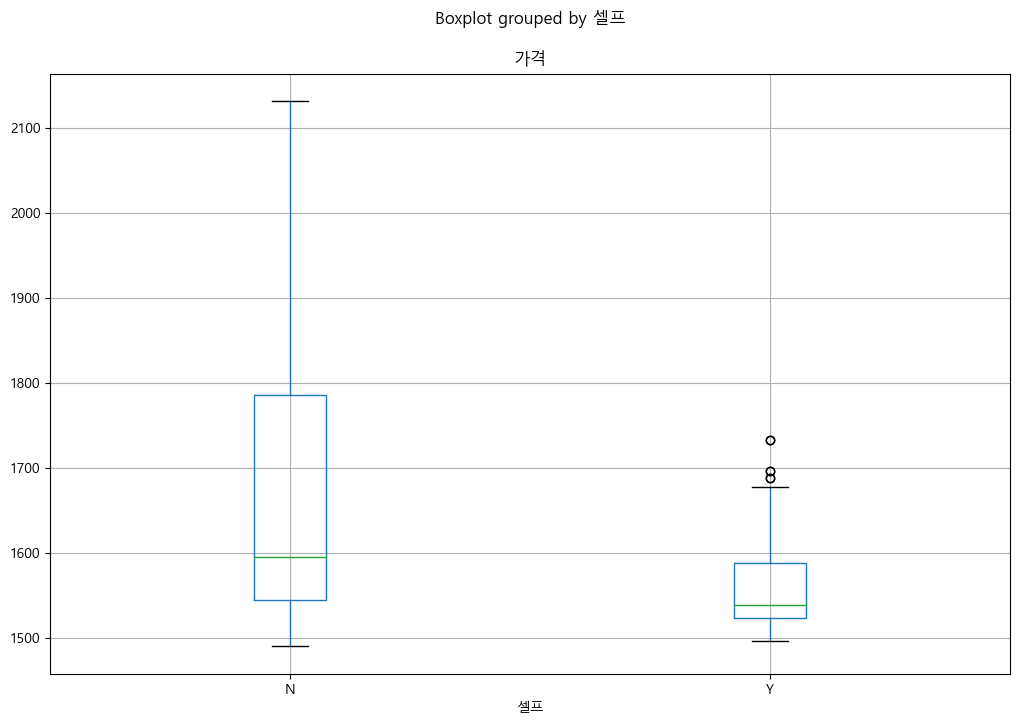

In [35]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

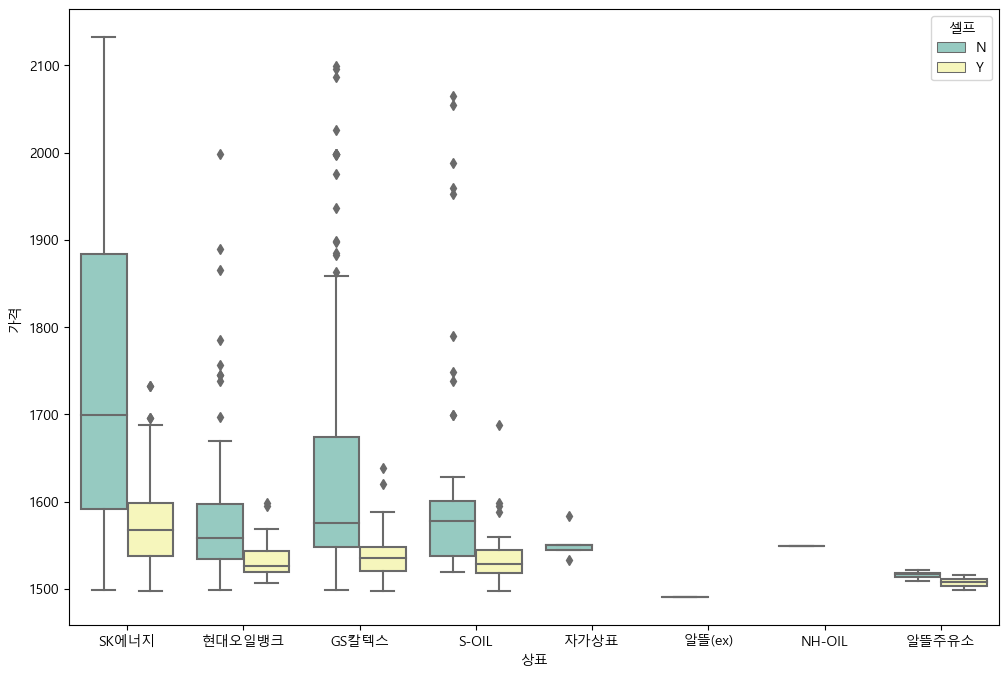

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

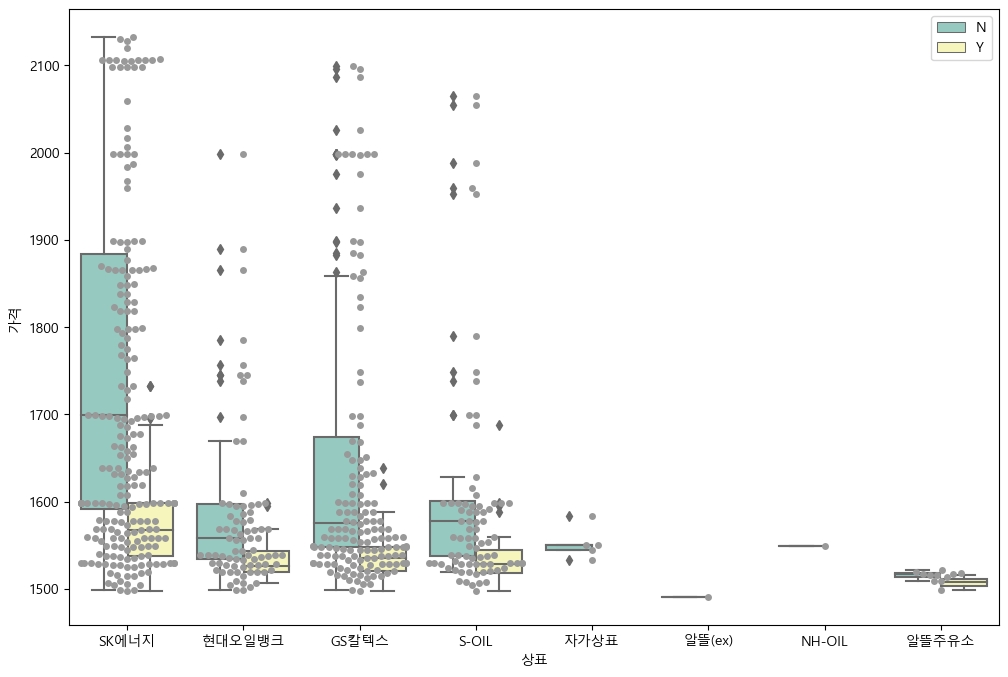

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

## 4-5. 서울시 구별 주유 가격 확인

In [38]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [39]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106.0,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구


In [40]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490.0,N,알뜰(ex),서초구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497.0,Y,SK에너지,강서구
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497.0,Y,S-OIL,노원구
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498.0,Y,GS칼텍스,강북구
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499.0,N,현대오일뱅크,영등포구
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,N,GS칼텍스,영등포구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499.0,N,SK에너지,구로구
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499.0,Y,SK에너지,중랑구
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499.0,N,현대오일뱅크,동작구


In [41]:
import numpy as np

gu_data = pd.pivot_table(stations, index=['구'], values=['가격'])
gu_data.head()

,가격
구,
강남구,1791.000000
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556


In [42]:
geo_path = '../../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5,
                tiles = 'Stamen Toner')

map.choropleth(geo_data=geo_str,
              data = gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='PuRd',
              key_on='feature.id')
map

## 4-6. 서울시 주유 가격 상하위 10개 주유소 지도에 표기

In [43]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106.0,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구


In [44]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490.0,N,알뜰(ex),서초구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497.0,Y,SK에너지,강서구
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497.0,Y,S-OIL,노원구
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498.0,Y,GS칼텍스,강북구
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499.0,N,현대오일뱅크,영등포구
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,N,GS칼텍스,영등포구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499.0,N,SK에너지,구로구
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499.0,Y,SK에너지,중랑구
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499.0,N,현대오일뱅크,동작구


In [49]:
# gmap_key = "본인 API"
# gmaps = googlemaps.Client(key=gmap_key)

In [46]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0] # '('를 기준으로 나눔
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    
    except:
        lat.append(np.nan)
        lng.append(np.nan)

oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구,37.558375,126.972094
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구,37.562780,127.007034
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구,37.478089,127.039592
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구,37.517647,127.035735
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구,37.513452,127.053684
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구,37.576426,126.985843
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구,37.540512,126.965311
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구,37.547038,126.972236
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106.0,N,SK에너지,용산구,37.534945,126.945876
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구,37.560850,127.003418


In [47]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0] # '('를 기준으로 나눔
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    
    except:
        lat.append(np.nan)
        lng.append(np.nan)

oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490.0,N,알뜰(ex),서초구,37.460084,127.042169
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497.0,Y,SK에너지,강서구,37.553962,126.768428
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497.0,Y,S-OIL,노원구,37.625965,127.085590
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498.0,Y,GS칼텍스,강북구,37.642156,127.029586
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499.0,N,현대오일뱅크,영등포구,37.510022,126.908238
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구,37.507761,126.900236
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,N,GS칼텍스,영등포구,37.498547,126.895759
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499.0,N,SK에너지,구로구,37.491052,126.826655
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499.0,Y,SK에너지,중랑구,37.590942,127.093807
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499.0,N,현대오일뱅크,동작구,37.487946,126.908325


In [48]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                           radius=15, color='#CD3181',
                           fill_color='#CD3181',
                           fill=True).add_to(map)
        
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]):
        folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                           radius=15, color='#3186cc',
                           fill_color='#3186cc',
                           fill=True).add_to(map)
map